**Shaik** **Yasmeen**

*   **Task 1** :  Simple *Linear regression model* for predicting the percentage of student based on number of Study Hours
*   Data Science and Business Analytics Intern



**Import all the required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Read the Dataset**

In [2]:
Data=pd.read_excel("Dataset.xlsx")
Data
#The Dataset has two columns namely Hours and Scores

,Hours,scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#returns a tuple shape(columns,rows) of dataframe
Data.shape

(25, 2)

In [4]:
#Checking for missing values or NAN
Data.isnull().any()

Hours     False
scores    False
dtype: bool

In [5]:
#returns top n(5 by default)rows of a dataframe
Data.head()

,Hours,scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
#returns last n(5 by default)rows of a dataframe
Data.tail()

,Hours,scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
#Gives information about the type of data, size of data, byte order of data
Data.dtypes

Hours     float64
scores      int64
dtype: object

In [8]:
#Used to view some basic statistical details like percentile, mean,std etc.
Data.describe()

,Hours,scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Exploratory Data analysis**(EDA)

*   EDA is an approach of analyzing datasets to summarize their main characteristics with visual methods




array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f335f893b70>,
      dtype=object)

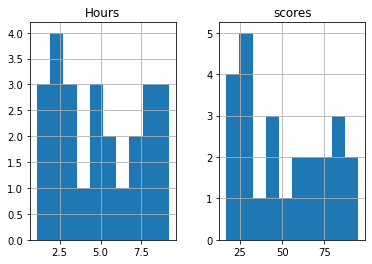

In [9]:
#The hist() function in pyplot module of matplotlib library is used to plot a histogram
Data.hist()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


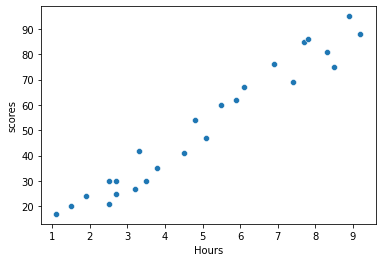

In [10]:
#Depicts how one data variable gets affected by the other data variable in every fraction of the value of the dataset
sns.scatterplot(Data['Hours'],Data['scores'])

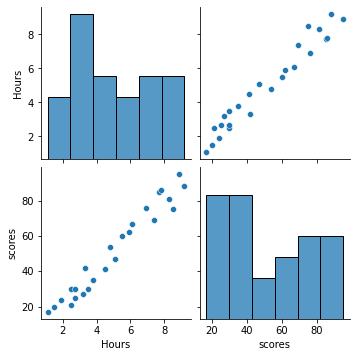

In [11]:
#Plotting of pairwise relationships in a dataset
sns.pairplot(Data)

In [12]:
#Used to find the pairwise correlation of all the columns in the dataframe
Data.corr()

,Hours,scores
Hours,1.000000,0.976191
scores,0.976191,1.000000


**Preparing the data**

In [13]:
#iloc[] method is used when the index label of a dataframe is other than numeric series
x=Data.iloc[:,:1]
y=Data.iloc[:,1:]

In [14]:
x.head(3)

,Hours
0,2.5
1,5.1
2,3.2


In [15]:
y.head(3)

,scores
0,21
1,47
2,27


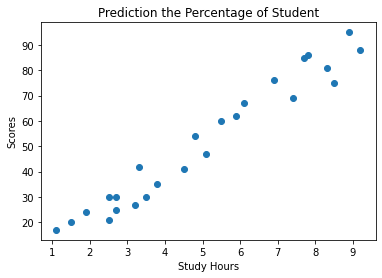

In [16]:
# Visualization of the dataset
plt.scatter(x, y)
plt.title('Prediction the Percentage of Student')
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.show()

**Splitting of the Data for Training and Testing**

In [17]:
#Splitting data arrays in to two subsets: for training data and for testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [18]:
Data.shape

(25, 2)

In [19]:
x_train.shape

(20, 1)

In [20]:
y_train.shape

(20, 1)

In [21]:
y_test.shape

(5, 1)

In [22]:
x_test.shape

(5, 1)

**Model Building (sklearn)**

*   The sklearn library contains a lot of efficient tools for Machine Learning and Statistical Modelling including classification, regression, clustering and dimentionality reduction.



In [23]:
#Linear Regression is used when we want to predict the value the value of a variable based on the value of another variable
from sklearn.linear_model import LinearRegression
linear_regression=LinearRegression()

*Training the Model*

In [24]:
linear_regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
#coefficient of the model
linear_regression.coef_

array([[9.94061514]])

In [26]:
#intercept of the model
linear_regression.intercept_

array([1.50791048])

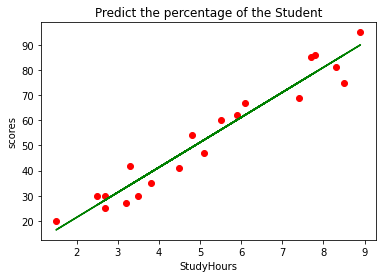

In [27]:
#Visualise result of Training set 
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, linear_regression.predict(x_train), color = 'green')
plt.title('Predict the percentage of the Student')
plt.xlabel('StudyHours')
plt.ylabel('scores')
plt.show()

*Testing the Model*

In [28]:
ypred=linear_regression.predict(x_test)
ypred

array([[12.44258714],
       [26.35944834],
       [20.39507925],
       [92.9615698 ],
       [70.09815497]])

In [29]:
x_test.head()

,Hours
14,1.1
0,2.5
17,1.9
6,9.2
23,6.9


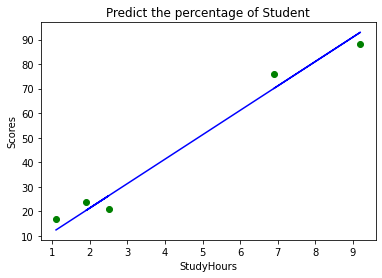

In [30]:
# Visualise result of Testing set 
plt.scatter(x_test, y_test, color = 'green')
plt.plot(x_test,linear_regression.predict(x_test), color = 'blue')
plt.title('Predict the percentage of Student')
plt.xlabel('StudyHours')
plt.ylabel('Scores')
plt.show()

**Accuracy of the Model**

In [31]:
#Accuracy of the model 
print('Accuracy of training set: '+str(linear_regression.score(x_train,y_train)*100))
print('Accuracy of testing set: '+str(linear_regression.score(x_test,y_test)*100))

Accuracy of training set: 94.23348138802984
Accuracy of testing set: 97.35538080811827


**Estimation of the Cost**

In [32]:
from sklearn.metrics import mean_squared_error,r2_score
rmse=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print('The R-Square value is : ',r_square)
print('The RMSE value is : ',rmse)

The R-Square value is :  0.9735538080811826
The RMSE value is :  4.9383823606376005


**Prediction of Unseen Values**

In [33]:
unknown_prediction=linear_regression.predict(np.array([[9.25]]))
print('The percentage of the student if he studies for 9.25 hours is : ',unknown_prediction)

The percentage of the student if he studies for 9.25 hours is :  [[93.45860056]]
